# Gradient Boosting Classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### Seprate the X & Y Variables

In [5]:
X = df.drop(columns='Drug')
Y = df[['Drug']]

In [6]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [7]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


### Seperate the Cat & Con Variables

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Sex', 'BP', 'Cholesterol']

In [10]:
con

['Age', 'Na_to_K']

### Create the Pipeline

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [12]:
### num_pipeline
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

### Cat_pipe
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])

### Combine both pipeline
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [14]:
X_pre = pre.fit_transform(X)
X_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [15]:
cols = pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [16]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,0.708057,-0.626917,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,-1.715759,-0.565995,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,0.465676,-0.859089,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,-1.291591,-0.286500,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### Label encode Y Features

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['Drug'] = le.fit_transform(Y['Drug'])

In [18]:
Y.head()

,Drug
0,0
1,3
2,3
3,4
4,0


In [19]:
Y.value_counts()

Drug
0       91
4       54
1       23
2       16
3       16
Name: count, dtype: int64

### Train test split

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=42)

In [22]:
xtrain.shape

(140, 9)

In [23]:
xtest.shape

(60, 9)

In [24]:
ytrain.value_counts()

Drug
0       65
4       36
1       16
2       13
3       10
Name: count, dtype: int64

In [25]:
ytest.value_counts()

Drug
0       26
4       18
1        7
3        6
2        3
Name: count, dtype: int64

### Create the Gradient Boosting model

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=1, max_depth=2, min_samples_split=5, min_samples_leaf=7, learning_rate=0.8)
model.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2, min_samples_leaf=7,
                           min_samples_split=5, n_estimators=1)

In [30]:
### Accuracy of Training data
model.score(xtrain,ytrain)

0.8785714285714286

In [31]:
### Accuracy of testing data
model.score(xtest,ytest)

0.8166666666666667

### Hyperparameter Tuning

In [36]:
params ={'n_estimators':[10,50,100,200],
         'learning_rate':[0.01,0.2,0.3,0.4],
         'max_depth':[2,3,4,5,6],
         'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12],
         'min_samples_leaf':[3,4,5,6,7,8,9,10,11,12,13]}

In [38]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv = RandomizedSearchCV(gbc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.2, 0.3, 0.4],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9, 10, 11, 12,
                                                             13],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11,
                                                              12],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [39]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 12,
 'max_depth': 2,
 'learning_rate': 0.3}

In [40]:
rscv.best_score_

0.9862857142857143

In [41]:
best_rscv = rscv.best_estimator_
best_rscv

GradientBoostingClassifier(learning_rate=0.3, max_depth=2, min_samples_leaf=12,
                           n_estimators=200)

In [42]:
### Accuracy in training
best_rscv.score(xtrain,ytrain)

1.0

In [43]:
best_rscv.score(xtest,ytest)

1.0

### Predict the data for train & test

In [44]:
ypred_tr = best_rscv.predict(xtrain)
ypred_ts = best_rscv.predict(xtest)

In [46]:
ypred_tr[0:5]

array([1, 0, 2, 0, 4])

In [48]:
ytrain.head()

,Drug
169,1
97,0
31,2
12,0
35,4


In [50]:
ypred_ts[0:5]

array([4, 0, 4, 3, 0])

In [51]:
ytest.head()

,Drug
95,4
15,0
30,4
158,3
128,0


### Confusion Matrix for Dataset

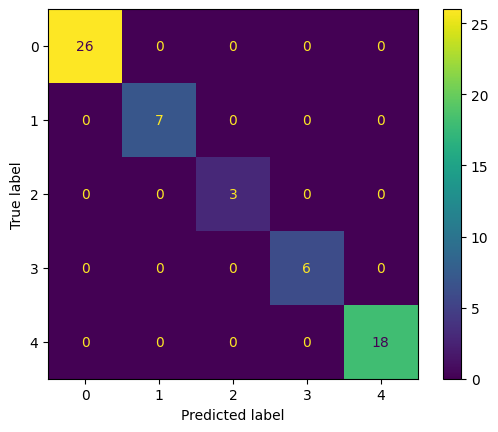

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_rscv.classes_)
cfd.plot()


### Plot the classification report

In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



### Predict original labels

In [54]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [55]:
ypred_tr_lb

array(['drugA', 'DrugY', 'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'drugB', 'drugX', 'drugX', 'drugX', 'drugB',
       'drugA', 'drugX', 'DrugY', 'drugX', 'drugA', 'drugX', 'drugC',
       'DrugY', 'drugA', 'drugA', 'drugA', 'drugB', 'drugB', 'drugA',
       'DrugY', 'drugA', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX',
       'drugB', 'drugX', 'DrugY', 'drugA', 'drugC', 'DrugY', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugX', 'drugX', 'drugB', 'DrugY',
       'drugB', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugA', 'DrugY', 'DrugY', 'DrugY', 'drugA', 'drugX', 'drugX',
       'DrugY', 'drugC', 'DrugY', 'DrugY', 'drugX', 'drugB', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugX', 'drugC', 'drugA', 'DrugY', 'drugA', 'drugA',
       'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'dru

In [56]:
ypred_ts_lb

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'DrugY', 'DrugY'], dtype=object)

### Feature Importance

In [57]:
imp = best_rscv.feature_importances_
imp = pd.Series(imp)
imp.index = xtrain.columns
imp = imp.sort_values(ascending=False)
imp

num__Na_to_K               0.662269
cat__BP_HIGH               0.179339
num__Age                   0.060220
cat__BP_LOW                0.043161
cat__BP_NORMAL             0.031923
cat__Cholesterol_NORMAL    0.012283
cat__Cholesterol_HIGH      0.010805
cat__Sex_F                 0.000000
cat__Sex_M                 0.000000
dtype: float64

<Axes: title={'center': 'Importance of Feature columns'}>

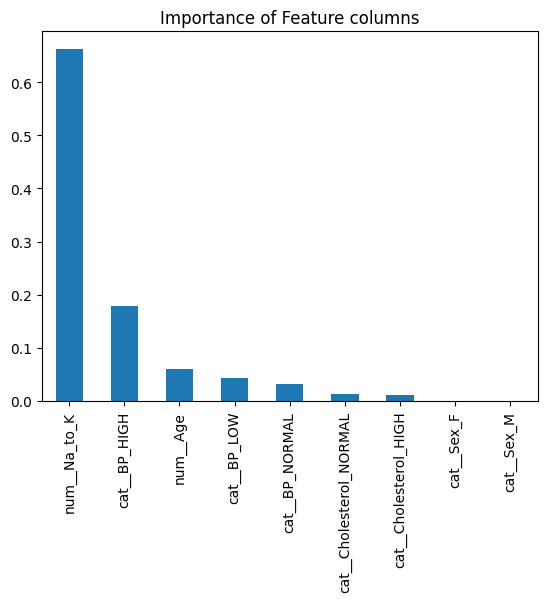

In [58]:
imp.plot(kind='bar',title='Importance of Feature columns')

### Predicition of new data

In [59]:
xnew = pd.read_csv('Test_drug.csv')
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,57,F,NORMAL,NORMAL,25.893
1,47,M,LOW,HIGH,13.093
2,74,M,HIGH,NORMAL,15.436
3,61,M,NORMAL,HIGH,9.443
4,18,F,NORMAL,NORMAL,8.750


In [60]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          30 non-null     int64  
 1   Sex          30 non-null     object 
 2   BP           30 non-null     object 
 3   Cholesterol  30 non-null     object 
 4   Na_to_K      30 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [61]:
xnew.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
dtype: int64

In [62]:
xnew_pre = pre.transform(xnew)
xnew_pre

array([[ 0.76865269,  1.36118344,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.16269866, -0.4151454 ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ],
       [ 1.79877454, -0.08999395,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 1.0110343 , -0.92167666,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ],
       [-1.59456803, -1.01784822,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.64746188, -0.70879476,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [-1.65516344, -0.72891723,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ],
       [ 1.19282051,  0.67271724,  0.        ,  1.        ,  1

In [63]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,0.768653,1.361183,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.798775,-0.089994,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.011034,-0.921677,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,-1.594568,-1.017848,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.647462,-0.708795,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6,-1.655163,-0.728917,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,1.192821,0.672717,0.0,1.0,1.0,0.0,0.0,0.0,1.0
8,0.768653,-0.852011,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9,-0.200874,-0.128851,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [64]:
preds = best_rscv.predict(xnew_pre)
preds

array([0, 3, 0, 4, 4, 2, 4, 0, 2, 0, 1, 0, 1, 3, 4, 4, 0, 4, 0, 0, 0, 4,
       0, 3, 1, 4, 0, 0, 0, 0])

In [65]:
preds_lb = le.inverse_transform(preds)
preds_lb

array(['DrugY', 'drugC', 'DrugY', 'drugX', 'drugX', 'drugB', 'drugX',
       'DrugY', 'drugB', 'DrugY', 'drugA', 'DrugY', 'drugA', 'drugC',
       'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'DrugY', 'drugC', 'drugA', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'DrugY'], dtype=object)

### Storing the values in table

In [66]:
xnew['Drug_pred'] = preds_lb

In [67]:
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_pred
0,57,F,NORMAL,NORMAL,25.893,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,74,M,HIGH,NORMAL,15.436,DrugY
3,61,M,NORMAL,HIGH,9.443,drugX
4,18,F,NORMAL,NORMAL,8.750,drugX
5,55,F,HIGH,HIGH,10.977,drugB
6,17,M,NORMAL,NORMAL,10.832,drugX
7,64,M,HIGH,NORMAL,20.932,DrugY
8,57,F,HIGH,NORMAL,9.945,drugB
9,41,M,HIGH,NORMAL,15.156,DrugY


In [68]:
xnew.to_csv('Results.csv',index=False)